In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy as scp
from iminuit import Minuit, cost
from IPython.core.display import Latex
import random
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)


### 3

#### 3.1

##### 3.1.1

Simulating two circles in 2D.

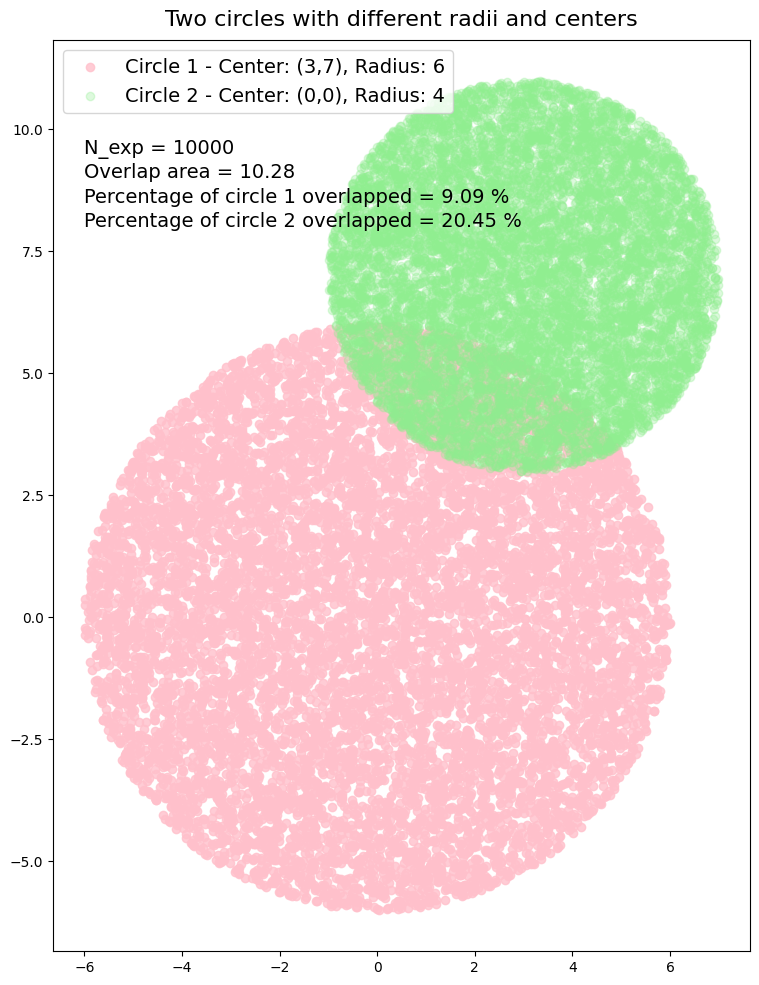

In [3]:
r_0 = 6
r_1 = 4

center_0 = [0,0]
center_1 = [3,7]

#simulating the two circles using accept/reject method of simulation

def circle(r, center):
    x = np.random.uniform(center[0]-r, center[0]+r)
    y = np.random.uniform(center[1]-r, center[1]+r)
    if (x-center[0])**2 + (y-center[1])**2 < r**2:
        return [x,y]
    else:
        return circle(r, center)
    
def circle_sim(r, center, n):
    return [circle(r, center) for i in range(n)]

circle_0 = circle_sim(r_0, center_0, 10000)

circle_1 = circle_sim(r_1, center_1, 10000)

#plotting the two circles

#estimating the overlap area

def overlap_area(r_0, r_1, d):
    if d >= r_0 + r_1:
        return 0
    if d <= abs(r_0 - r_1):
        return np.pi * min(r_0, r_1)**2
    alpha_0 = 2*np.arccos((r_0**2 - r_1**2 + d**2)/(2*r_0*d))
    alpha_1 = 2*np.arccos((r_1**2 - r_0**2 + d**2)/(2*r_1*d))
    return 0.5*(r_0**2*(alpha_0 - np.sin(alpha_0)) + r_1**2*(alpha_1 - np.sin(alpha_1)))

d = np.linalg.norm(np.array(center_0) - np.array(center_1))

overlap = overlap_area(r_0, r_1, d)

#estimating area of circle 1 and 0 respectively

area_0 = np.pi * r_0**2
area_1 = np.pi * r_1**2

fraction_of_circle_0 = overlap/area_0
fraction_of_circle_1 = overlap/area_1


circle_0 = np.array(circle_0)

circle_1 = np.array(circle_1)

fig, ax = plt.subplots(figsize = (10,10))
fig.suptitle('Two circles with different radii and centers', fontsize = 16)
ax.scatter(circle_0[:,0], circle_0[:,1], alpha = 0.8, color = 'pink', label = 'Circle 1 - Center: (3,7), Radius: 6')
ax.scatter(circle_1[:,0], circle_1[:,1], alpha = 0.3,color = 'lightgreen', label = 'Circle 2 - Center: (0,0), Radius: 4')
ax.set_aspect('equal')
plt.legend(fontsize = 14)
plt.text(-6, 9.5,'N_exp = 10000', fontsize = 14)
plt.text(-6, 9, 'Overlap area = {:.2f}'.format(overlap), fontsize = 14)
plt.text(-6, 8.5, 'Percentage of circle 1 overlapped = {:.2f} %'.format(fraction_of_circle_0*100), fontsize = 14)
plt.text(-6, 8, 'Percentage of circle 2 overlapped = {:.2f} %'.format(fraction_of_circle_1*100), fontsize = 14)
plt.tight_layout()
plt.savefig('images/two_circles.png', dpi = 600)



In [4]:
#estimating the overlap area

def overlap_area(r_0, r_1, d):
    if d >= r_0 + r_1:
        return 0
    if d <= abs(r_0 - r_1):
        return np.pi * min(r_0, r_1)**2
    alpha_0 = 2*np.arccos((r_0**2 - r_1**2 + d**2)/(2*r_0*d))
    alpha_1 = 2*np.arccos((r_1**2 - r_0**2 + d**2)/(2*r_1*d))
    return 0.5*(r_0**2*(alpha_0 - np.sin(alpha_0)) + r_1**2*(alpha_1 - np.sin(alpha_1)))

d = np.linalg.norm(np.array(center_0) - np.array(center_1))

overlap_area(r_0, r_1, d)

#estimating area of circle 1 and 0 respectively

area_0 = np.pi * r_0**2
area_1 = np.pi * r_1**2

area_0, area_1

(113.09733552923255, 50.26548245743669)

In [5]:
#now in 4d

center_0_4d = [0,0,0,0]
center_1_4d = [3,7,-1,2]

r_0_4d = 6
r_1_4d = 4

def circle_4d(r, center):
    x = np.random.uniform(center[0]-r, center[0]+r)
    y = np.random.uniform(center[1]-r, center[1]+r)
    z = np.random.uniform(center[2]-r, center[2]+r)
    w = np.random.uniform(center[3]-r, center[3]+r)
    if (x-center[0])**2 + (y-center[1])**2 + (z-center[2])**2 + (w-center[3])**2 < r**2:
        return [x,y,z,w]
    else:
        return circle_4d(r, center)
    
def circle_sim_4d(r, center, n):

    return [circle_4d(r, center) for i in range(n)]

circle_0_4d = circle_sim_4d(r_0_4d, center_0_4d, 10000)

circle_1_4d = circle_sim_4d(r_1_4d, center_1_4d, 10000)

circle_0_4d = np.array(circle_0_4d)

circle_1_4d = np.array(circle_1_4d)

#plotting the two circles

#estimating the overlap volume

def overlap_volume_4d(r_0, r_1, d):
    if d >= r_0 + r_1:
        return 0
    if d <= abs(r_0 - r_1):
        return np.pi * min(r_0, r_1)**2
    alpha_0 = 2*np.arccos((r_0**2 - r_1**2 + d**2)/(2*r_0*d))
    alpha_1 = 2*np.arccos((r_1**2 - r_0**2 + d**2)/(2*r_1*d))
    return 0.5*(r_0**2*(alpha_0 - np.sin(alpha_0)) + r_1**2*(alpha_1 - np.sin(alpha_1)))

d_4d = np.linalg.norm(np.array(center_0_4d) - np.array(center_1_4d))

overlap_4d = overlap_volume_4d(r_0_4d, r_1_4d, d_4d)

#estimating volume of circle 1 and 0 respectively

volume_0_4d = (4/3)*np.pi * r_0_4d**3
volume_1_4d = (4/3)*np.pi * r_1_4d**3

fraction_of_circle_0_4d = overlap_4d/volume_0_4d

fraction_of_circle_1_4d = overlap_4d/volume_1_4d

print('Overlap volume = ', overlap_4d)
print('Volume of circle 0 = ', volume_0_4d)
print('Volume of circle 1 = ', volume_1_4d)
print('Percentage of circle 0 overlapped = ', fraction_of_circle_0_4d*100)
print('Percentage of circle 1 overlapped = ', fraction_of_circle_1_4d*100)




Overlap volume =  8.326115125274015
Volume of circle 0 =  904.7786842338603
Volume of circle 1 =  268.082573106329
Percentage of circle 0 overlapped =  0.9202377631524687
Percentage of circle 1 overlapped =  3.1058024506395823


##### 3.1.2

Simulating a uniform explosion

[1.08246435 1.25600397 0.39794522 ... 1.0892322  0.42138999 1.06725779]


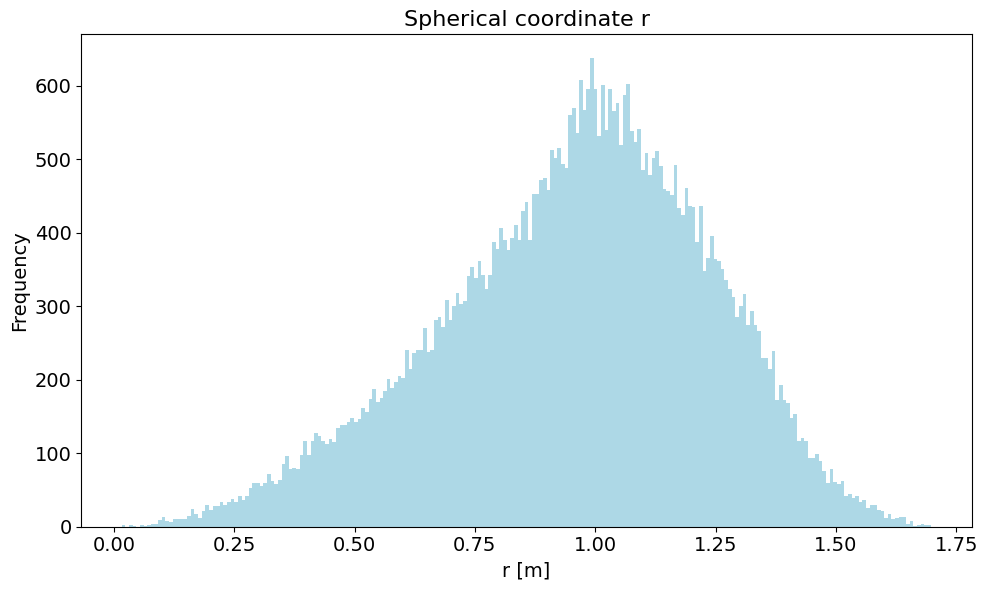

In [20]:
range_all = [-1,1]
N_points = 50000

x = np.random.uniform(range_all[0], range_all[1], N_points)
y = np.random.uniform(range_all[0], range_all[1], N_points)
z = np.random.uniform(range_all[0], range_all[1], N_points)

def spherical_coordinates(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.sign(y)*np.arccos(x/np.sqrt(x**2 + y**2))
    return r, theta, phi

#plotting the spherical coordinate r in 3d

r, theta, phi = spherical_coordinates(x, y, z)

print(r)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(r, bins = int(np.sqrt(N_points)), color = 'lightblue')
ax.set_xlabel('r [m]', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Spherical coordinate r', fontsize = 16)
ax.tick_params(axis = 'both', labelsize = 14)
plt.tight_layout()
plt.savefig('images/spherical_coordinate_r_3d.png', dpi = 600)  


13071


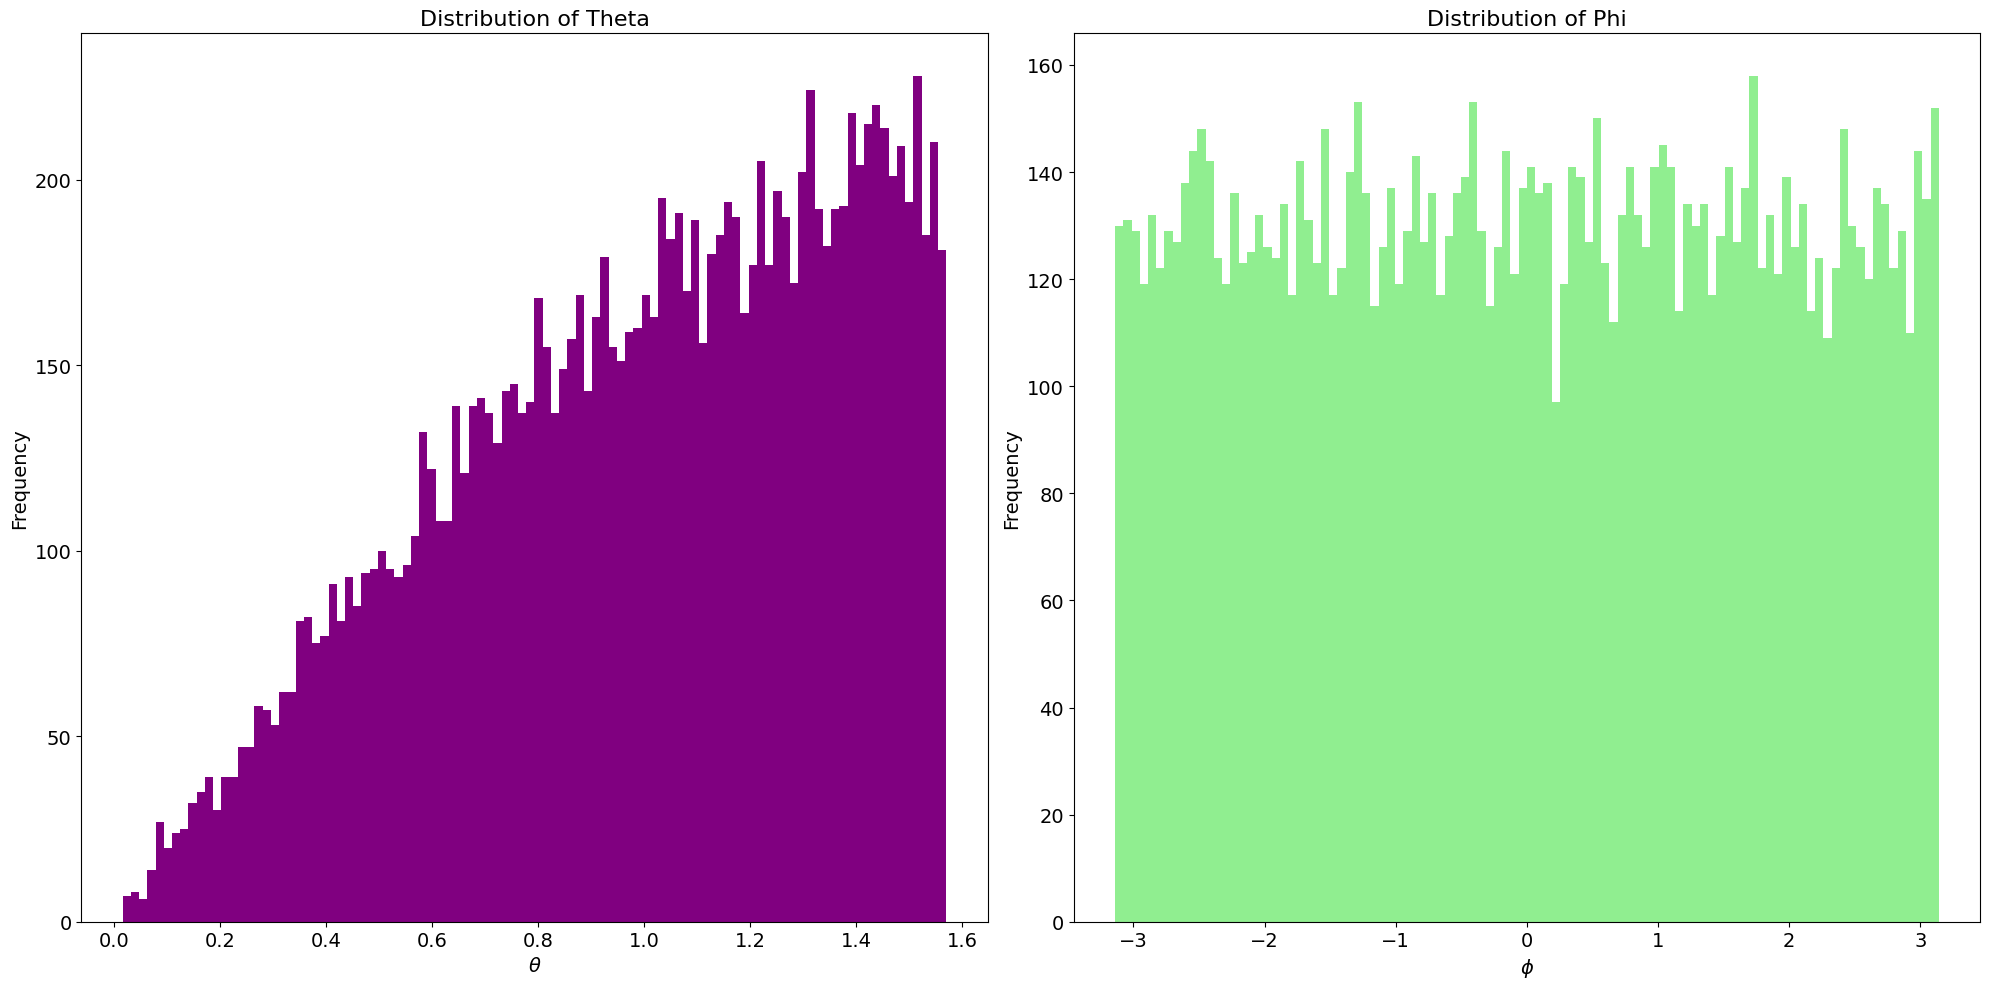

In [26]:
#selecting only the positive values of z, and where r < 1

z_mask = z[z>0]
x_mask = np.random.uniform(range_all[0], range_all[1], len(z_mask))
y_mask = np.random.uniform(range_all[0], range_all[1], len(z_mask))


def spherical_coordinates_with_mask(x, y, z):
    rs = []
    thetas = []
    phis = []
    for i in range(len(z)):
        r = np.sqrt(x[i]**2 + y[i]**2 + z[i]**2)
        if r < 1.0:
            theta = np.arccos(z[i]/r)
            phi = np.sign(y[i])*np.arccos(x[i]/np.sqrt(x[i]**2 + y[i]**2))
            rs.append(r)
            thetas.append(theta)
            phis.append(phi)
    return rs, thetas, phis

r, theta, phi = spherical_coordinates_with_mask(x_mask, y_mask, z_mask)

#plotting the distribution of theta and phi, where r < 1

theta = np.array(theta)

phi = np.array(phi)

print(len(phi))

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].hist(theta, bins = 100, color = 'purple')
ax[0].set_xlabel('$\\theta$', fontsize = 14)
ax[0].set_ylabel('Frequency', fontsize = 14)
ax[0].set_title('Distribution of Theta', fontsize = 16)
ax[1].hist(phi, bins = 100, color='lightgreen')
ax[1].set_xlabel('$\phi$', fontsize = 14)
ax[1].set_ylabel('Frequency', fontsize = 14)
ax[1].set_title('Distribution of Phi', fontsize = 16)
ax[0].tick_params(axis = 'both', labelsize = 14)
ax[1].tick_params(axis = 'both', labelsize = 14)
plt.tight_layout()
plt.savefig('images/distribution_theta_phi.png', dpi = 600)

In [ ]:
np.pi/2

##### 3.1.3

3090


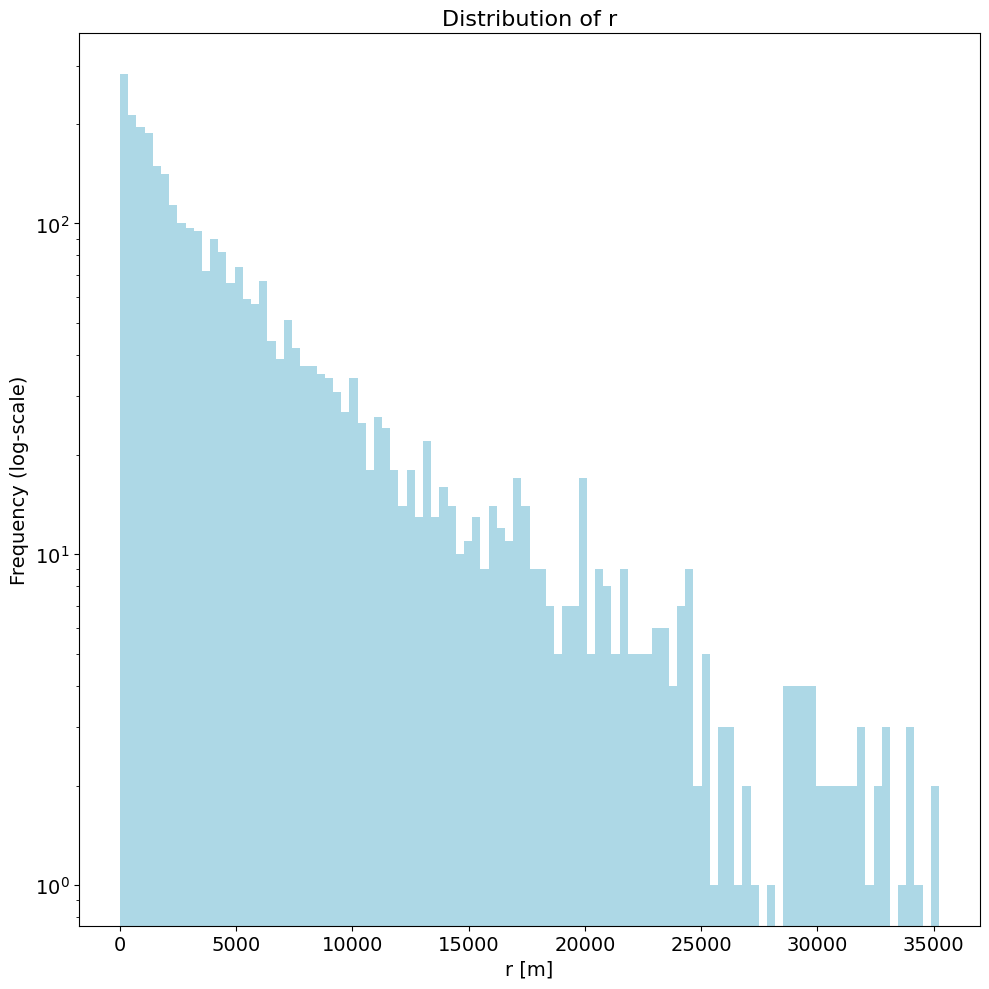

In [27]:
#Simulating 1000 points of v and theta in a collision
g = 9.82
v0 = 100

def f(v, v0):
    return (v/v0)**2 * np.exp(-v/v0)

def r(v, theta):
    return np.sin(theta)*v**2/g

#simulating 10000 v and theta with accept rejct

def v_theta_sim(v0, N):
    v = np.random.uniform(0, 6*v0, N)
    theta = np.random.uniform(0, np.pi/2, N)
    p = np.random.uniform(0, 1, N)
    mask = p < f(v, v0)
    return v[mask], theta[mask]

v, theta = v_theta_sim(v0, 10000)

r = r(v, theta)

print(len(r))

fig = plt.figure(figsize = (10,10))
plt.hist(r, bins = 100, color = 'lightblue')
plt.xlabel('r [m]', fontsize = 14)
plt.ylabel('Frequency (log-scale)', fontsize = 14)
plt.yscale('log')
#plt.xscale('log')
plt.tick_params(axis = 'both', labelsize = 14)
plt.title('Distribution of r', fontsize = 16)
plt.savefig('images/distribution_r.png', dpi = 600)
plt.tight_layout()
